# MazeRunner

We want to solve the maze exiting game.
The maze is composed by a rectangular grid where we have some positions occupied by walls
(corresponding to unreachable positions).

Given a grid N x M, the initial position and the exit on a border of the grid, we want to find the shortest path
to exit the maze.

Solve the problem by implementing the following search strategies:
- Breadth First
- Depth-First
- Uniform-cost [consider the following weights for the actions: up = 3; left = 2; right = 2; down = 1]
- Iterative Deepening
- Greedy
- A*

Regarding positions on the border, we have the following rules:
- Left border: you can’t go left
- Right border: you can’t go right
- Upper border: you can’t go up
- Lower border: you can’t go down

Input.

- N – Width of the grid
- M – Height of the grid
- K – Number of unreachable elements
- V – Coordinates of unreachable elements
- I – Initial position
- G – Position of the Goal on the border of the grid

Output.

A representation of the grid with unreachable elements and the path computed for each algorithm. Use the
following conventions:
- Unreachable elements are represented by ‘o’
- Initial position is represented by ‘i’
- Goal position is represented by ‘g’
- Path is represented by ‘*’

# Proposed solution

Import required libraries and enable matplotlib inline

In [1]:
import queue
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy

from IPython.display import display, Markdown

# Enable plots inside the Jupyter Notebook
%matplotlib inline

Specify N rows and M columns

In [2]:
N = 7
M = 7

The class Node will describe our node in the tree.

In [3]:
class Node:
    def __init__(self, _matrix, depth, cost, last_y, last_x, father, total_cost, _heuristic):
        self.matrix = _matrix  # instance variable unique to each instance
        self.depth = depth
        self.cost = cost
        self.last_y = last_y
        self.last_x = last_x
        self.father = father
        self.total_cost = total_cost
        self.heuristic = _heuristic

    # In the Uniform Cost algorithm we select the "move" with lower cost.
    # We overwrite the "lesser than" method because we need to specify what "lesser than" means when speaking of nodes.

    def __lt__(self, other):
        return self.total_cost < other.total_cost

    def __deepcopy__(self, memo):  # memo is a dict of id's to copies
        id_self = id(self)  # memoization avoids unnecessary recursion
        _copy = memo.get(id_self)
        if _copy is None:
            _copy = type(self)(
                deepcopy(self.matrix),
                deepcopy(self.depth),
                deepcopy(self.cost),
                deepcopy(self.last_y),
                deepcopy(self.last_x),
                deepcopy(self.father),
                deepcopy(self.total_cost),
                deepcopy(self.heuristic))
            memo[id_self] = _copy
        return _copy

Let's declare a matrix which represents our maze.

In [4]:
matrix = numpy.zeros((int(N), int(M)), dtype=int)

# Initial position
iy = 0
ix = 0

# Position of the goal
gy = 6
gx = 6

allowed_gx = [0, N - 1]
allowed_gy = [0, M - 1]

if not ((gx in allowed_gx) or (gy in allowed_gy)):
    print("Goal position not allowed.")
    print("Goal must stay on the border.")
    exit()

# Specifying the unreachable elements
not_reachable = [[1, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 6], [3, 6], [4, 5], [5, 5]]
for element in not_reachable:
    matrix[element[0], element[1]] = 3

# Setting initial position and goal on the matrix
matrix[ix, iy] = 1
matrix[gx, gy] = 4

The heuristic function is a function which helps us to decide which step we should take.

In [5]:
def heuristic(x, y):
    """Heuristic function is the absolute distance between two tiles on a 2d plane"""
    distance = abs((gx - x)) + abs((gy - y))
    return distance

The expand function expands a node in the tree.

In [6]:
def expand(node, exp):
    new_node_last_y = getattr(node, "last_y")
    new_node_last_x = getattr(node, "last_x")
    new_node_cost = getattr(node, "cost")
    # expand up
    if exp == 0:
        if new_node_last_y > 0:
            new_node_last_y -= 1
            new_node_cost = 3
        else:
            return None
    # expand down
    elif exp == 3:
        if new_node_last_y < N - 1:
            new_node_last_y += 1
            new_node_cost = 1
        else:
            return None
    # expand right
    elif exp == 2:
        if new_node_last_x < M - 1:
            new_node_last_x += 1
            new_node_cost = 2
        else:
            return None
    # expand left
    elif exp == 1:
        if new_node_last_x > 0:
            new_node_last_x -= 1
            new_node_cost = 2
        else:
            return None

    # If the point is the initial one
    if new_node_last_y == ix and new_node_last_x == iy:
        return None
    # If the point is not reachable
    elif [new_node_last_y, new_node_last_x] in not_reachable:
        return None
    # If the point is already visited
    elif node.matrix[new_node_last_y][new_node_last_x] == 2:
        return None

    new_node = deepcopy(node)
    new_node.last_y = new_node_last_y
    new_node.last_x = new_node_last_x
    new_node.cost = new_node_cost

    if not (new_node.last_y == gx and new_node.last_x == gy):
        new_node.matrix[new_node_last_y][new_node_last_x] = 2

    new_node.depth += 1
    new_node.father = node
    new_node.total_cost = node.total_cost + new_node.cost
    new_node.heuristic = heuristic(new_node.last_y, new_node.last_x)
    return new_node

# Breadth First Search

Here we define the Breadth-First Search algorithm.

Remember what Breadth-First Search is about:

![title](img/bfs1.png)

In [7]:
def bfs(_root):
    fringe = queue.Queue()

    if not (_root.last_y == gx and _root.last_x == gy):
        fringe.put(_root)
    else:
        print("Initial state and final state are the same")
        return

    while not fringe.empty():
        current_node = fringe.get()
        if not (current_node.last_y == gx and current_node.last_x == gy):
            for i in range(4):
                ret_val = expand(current_node, i)
                if ret_val is not None:
                    fringe.put(ret_val)
        else:
            prettify_matrix(current_node, "Breadth-First Search - Solution found")
            return

    print("Breadth-First Search - Solution not found")

This function helps us with printing.

In [8]:
def prettify_matrix(node_input, text=None):
    if isinstance(node_input, Node):
        _matrix = node_input.matrix
    else:
        _matrix = node_input

    display(Markdown("# "+text))
    
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 3
    plt.pcolormesh(_matrix)
    plt.gca().set_aspect('equal')  # set the x and y axes to the same scale
    plt.xticks([])  # remove the tick marks by setting to an empty list
    plt.yticks([])  # remove the tick marks by setting to an empty list
    plt.gca().invert_yaxis()  # invert the y-axis so the first row of data is at the top
    plt.show()
    
    if isinstance(node_input, Node):
        print("Solution depth is: {}".format(node_input.depth))
        print("Total cost of the solution is: {}".format(node_input.total_cost))

Here we specify a root node. Then we print the starting labyrinth and some informations.
Finally we run Breadth-First Search and show the results.

===MazeRunner===
Labyrinth dimensions: 7x7
Unreachable points: 9
Starting point: 0, 0
Goal: 6, 6


# The labyrinth is represented by the following matrix:

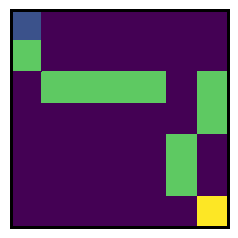

# Breadth-First Search - Solution found

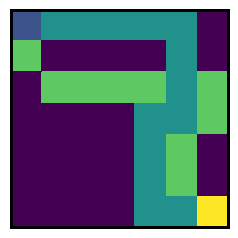

Solution depth is: 14
Total cost of the solution is: 22


In [9]:
root = Node(matrix, 0, 1, iy, ix, None, 0, heuristic(iy, ix))
print("===MazeRunner===")
print("Labyrinth dimensions: {}x{}".format(N, M))
print("Unreachable points: {}".format(len(not_reachable)))
print("Starting point: {}, {}".format(iy, ix))
print("Goal: {}, {}".format(gx, gy))
prettify_matrix(matrix, "The labyrinth is represented by the following matrix:")

bfs(root)

# Depth First Search

Here we define the Depth-First Search algorithm.

Remember what Depth-First Search is about:

![title](img/dfs1.png)

In [10]:
def dfs(_root):
    fringe = queue.LifoQueue()

    if not (_root.last_y == gx and _root.last_x == gy):
        fringe.put(_root)
    else:
        print("Initial state and final state are the same")
        return

    while not fringe.empty():
        current_node = fringe.get()
        if not (current_node.last_y == gx and current_node.last_x == gy):
            for i in range(4):
                ret_val = expand(current_node, i)
                if ret_val is not None:
                    fringe.put(ret_val)
        else:
            prettify_matrix(current_node, "Depth-First Search - Solution found")
            return

    print("Depth-First Search - Solution not found")

Now we can run it and show results

# Depth-First Search - Solution found

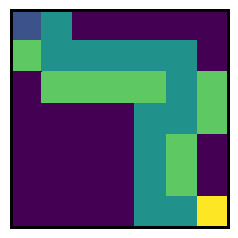

Solution depth is: 14
Total cost of the solution is: 22


In [11]:
dfs(root)

# Uniform Cost Search

Here we define the Uniform Cost Search algorithm.

In [12]:
def uniform_cost(_root):
    fringe = queue.PriorityQueue()

    if not (_root.last_y == gx and _root.last_x == gy):
        fringe.put((_root.total_cost, _root))  # Insert into PriorityQueue a tuple (cost, node)
    else:
        print("Initial state and final state are the same")
        return

    while not fringe.empty():
        current_node = fringe.get()[1]
        if not (current_node.last_y == gx and current_node.last_x == gy):
            for i in range(4):
                ret_val = expand(current_node, i)
                if ret_val is not None:
                    fringe.put((ret_val.total_cost, ret_val))
        else:
            prettify_matrix(current_node, "Uniform Cost - Solution found")
            return
    print("Uniform Cost - Solution not found")

# Uniform Cost - Solution found

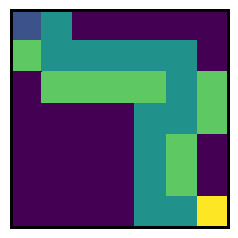

Solution depth is: 14
Total cost of the solution is: 22


In [13]:
uniform_cost(root)

# Iterative Deepening Search

Here we define the Iterative Deepening Search algorithm.

Here's a picture that shows how Iterative Deepening Search algorithm works.

![title](img/ids.png)


In [14]:
def ids(_root):
    limit = 1
    while True:
        fringe = queue.LifoQueue()

        if not (_root.last_y == gx and _root.last_x == gy):
            fringe.put(_root)
        else:
            print("Initial state and final state are the same")
            return

        while not fringe.empty():
            current_node = fringe.get()
            if not (current_node.last_y == gx and current_node.last_x == gy):
                for i in range(4):
                    ret_val = expand(current_node, i)
                    if ret_val is not None:
                        # Insert the expanded node into the fringe only if the depth is lesser than the max
                        if ret_val.depth <= limit:
                            fringe.put(ret_val)
            else:
                prettify_matrix(current_node,
                                "Iterative deepening search - Solution found with limit: {}".format(limit))
                return
        limit += 1


# Iterative deepening search - Solution found with limit: 14

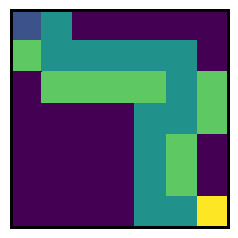

Solution depth is: 14
Total cost of the solution is: 22


In [15]:
ids(root)

# Greedy Search

Here we define the Greedy Search algorithm.

In [16]:
def greedy(_root):
    fringe = queue.PriorityQueue()

    if not (_root.last_y == gx and _root.last_x == gy):
        fringe.put((_root.total_cost, _root))  # Insert into PriorityQueue a tuple (cost, node)
    else:
        print("Initial state and final state are the same")
        return

    while not fringe.empty():
        current_node = fringe.get()[1]
        if not (current_node.last_y == gx and current_node.last_x == gy):
            for i in range(4):
                ret_val = expand(current_node, i)
                if ret_val is not None:
                    fringe.put((ret_val.heuristic, ret_val))
        else:
            prettify_matrix(current_node, "Greedy Search - Solution found")
            return
    print("Greedy Search - Solution not found")

# Greedy Search - Solution found

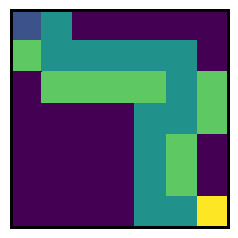

Solution depth is: 14
Total cost of the solution is: 22


In [17]:
greedy(root)

# A* Search

Here we define the A* Search algorithm.

In [18]:
def a_star(_root):
    fringe = queue.PriorityQueue()

    if not (_root.last_y == gx and _root.last_x == gy):
        fringe.put((_root.total_cost, _root))  # Insert into PriorityQueue a tuple (cost, node)
    else:
        print("Initial state and final state are the same")
        return

    while not fringe.empty():
        current_node = fringe.get()[1]
        if not (current_node.last_y == gx and current_node.last_x == gy):
            for i in range(4):
                ret_val = expand(current_node, i)
                if ret_val is not None:
                    fringe.put((ret_val.heuristic + ret_val.total_cost, ret_val))
        else:
            prettify_matrix(current_node, "A Star Search - Solution found")
            return
    print("A Star Search - Solution not found")

# A Star Search - Solution found

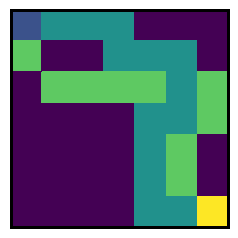

Solution depth is: 14
Total cost of the solution is: 22


In [19]:
a_star(root)